In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import shutil

def remove_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents successfully removed.")
    except Exception as e:
        print(f"An error occurred while removing the folder: {e}")



In [3]:
# remove folders
folder_to_remove = "sample-notebooks"
remove_folder(folder_to_remove)

An error occurred while removing the folder: [Errno 2] No such file or directory: 'sample-notebooks'


In [4]:
#-------------------------------------------------------------------------------------------------------
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
######################################################################################### seeing admissions.csv file

In [7]:
!ls mimic-iv-2.2/icu

caregiver.csv.gz       d_items.csv.gz		inputevents.csv.gz
chartevents.csv.gz     icustays.csv.gz		outputevents.csv.gz
datetimeevents.csv.gz  ingredientevents.csv.gz	procedureevents.csv.gz


In [8]:
#df0 = pd.read_csv('mimic-iv-2.2/hosp/admissions.csv.gz',compression='gzip')
df0  = pd.read_csv('mimic-iv-2.2/hosp/admissions.csv.gz')

In [9]:
df0.shape

(431231, 16)

In [10]:
df0.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
dtype: int64

In [11]:
df0.loc[:,'deathtime'].value_counts()

2131-01-20 05:15:00    1
2183-04-12 07:55:00    1
2145-03-30 16:37:00    1
2137-09-06 21:33:00    1
2188-07-02 22:10:00    1
                      ..
2173-06-11 18:00:00    1
2123-03-27 10:00:00    1
2123-01-17 16:23:00    1
2110-12-15 19:59:00    1
2164-09-17 13:42:00    1
Name: deathtime, Length: 8598, dtype: int64

In [12]:
df0.describe()

,subject_id,hadm_id,hospital_expire_flag
count,4.312310e+05,4.312310e+05,431231.000000
mean,1.500766e+07,2.500314e+07,0.019964
std,2.877498e+06,2.888180e+06,0.139876
min,1.000003e+07,2.000002e+07,0.000000
25%,1.251557e+07,2.250155e+07,0.000000
50%,1.501288e+07,2.500669e+07,0.000000
75%,1.749622e+07,2.750470e+07,0.000000
max,1.999999e+07,2.999993e+07,1.000000


In [13]:
df0['admission_type'].value_counts()

EW EMER.                       149413
EU OBSERVATION                  94776
OBSERVATION ADMIT               52668
URGENT                          44691
SURGICAL SAME DAY ADMISSION     34231
DIRECT EMER.                    19554
DIRECT OBSERVATION              18707
ELECTIVE                        10565
AMBULATORY OBSERVATION           6626
Name: admission_type, dtype: int64

Create the admission

In [14]:
#Convert ADMITTIME and DISCHTIME columns to datetime
df0['admittime'] = pd.to_datetime(df0['admittime'])
df0['dischtime'] = pd.to_datetime(df0['dischtime'])

#Filter rows with time difference within 30 days
#within_30_days = df0[df0.apply(lambda row: (row['dischtime'] - row['admittime']).days <= 30, axis=1)]
#within_30_days

df0.sort_values(by='admittime', inplace=True)

#Defino o filtro do meu grupo numa função e garanto os não null´s
def filter_within_30_days(group):
    disch_rows = group[group['dischtime'].notnull()]
    return group[(group['admittime'] > disch_rows['dischtime'].iloc[0]) & (group['admittime'] <= disch_rows['dischtime'].iloc[0] + pd.Timedelta(days=30))]

#Aplico o filtro a cada grupo referente ao meu subject_id
result_df = df0.groupby('subject_id', group_keys=False).apply(filter_within_30_days)

#verifico o resultado
#print(result_df)

In [15]:
result_df.shape

(27694, 16)

In [16]:
result_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
17,10000826,21086876,2146-12-18 17:39:00,2146-12-24 19:55:00,NaN,DIRECT EMER.,P86FCY,CLINIC REFERRAL,HOME,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
18,10000826,28289260,2146-12-31 00:43:00,2147-01-02 17:45:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOME,Other,ENGLISH,SINGLE,WHITE,2146-12-30 17:06:00,2146-12-31 02:10:00,0
19,10000883,25221576,2124-05-14 21:11:00,2124-05-22 10:40:00,NaN,DIRECT EMER.,P64BMC,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,SINGLE,WHITE,2124-05-14 15:13:00,2124-05-14 21:35:00,0
24,10000935,24955974,2183-11-07 06:03:00,2183-11-07 11:19:00,NaN,EU OBSERVATION,P20D4W,EMERGENCY ROOM,NaN,Medicare,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,2183-11-07 01:05:00,2183-11-07 11:19:00,0
37,10001186,24016413,2188-10-20 07:15:00,2188-10-21 15:05:00,NaN,SURGICAL SAME DAY ADMISSION,P769P2,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [17]:
result_df.nunique()

subject_id              23979
hadm_id                 27694
admittime               27676
dischtime               27627
deathtime                 630
admission_type              9
admit_provider_id        1200
admission_location         11
discharge_location         13
insurance                   3
language                    2
marital_status              4
race                       33
edregtime               18104
edouttime               18106
hospital_expire_flag        2
dtype: int64

In [18]:
result_df.isna().sum()   #contagem dos NaN

subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
deathtime               27064
admission_type              0
admit_provider_id           0
admission_location          0
discharge_location       5354
insurance                   0
language                    0
marital_status            569
race                        0
edregtime                9434
edouttime                9434
hospital_expire_flag        0
dtype: int64

In [55]:
result_df.to_csv('result.csv', index='False')

Drop with a function

In [59]:
#drop columns
#columns_to_drop = ['language','edregtime','edouttime']
#droped_30days_df = result_df.drop(columns=columns_to_drop)
#droped_30days_df.isna().sum()

#columns_to_drop = ['language', 'edregtime', 'edouttime']

def drop_columns_and_check_missing(dataframe, columns_to_drop):
    # Drop the specified columns
    droped_df = dataframe.drop(columns=columns_to_drop)
    
    # Check for missing values
    missing_values = droped_df.isna().sum()
    
    return droped_df, missing_values


# Columns to drop
columns_to_drop = ['language', 'edregtime', 'edouttime']

# Call the function to drop columns and check for missing values
droped_30days_df, missing_values = drop_columns_and_check_missing(result_df, columns_to_drop)

droped_30days_df


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag
17,10000826,21086876,2146-12-18 17:39:00,2146-12-24 19:55:00,NaN,DIRECT EMER.,P86FCY,CLINIC REFERRAL,HOME,Other,SINGLE,WHITE,0
18,10000826,28289260,2146-12-31 00:43:00,2147-01-02 17:45:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOME,Other,SINGLE,WHITE,0
19,10000883,25221576,2124-05-14 21:11:00,2124-05-22 10:40:00,NaN,DIRECT EMER.,P64BMC,PHYSICIAN REFERRAL,HOME,Other,SINGLE,WHITE,0
24,10000935,24955974,2183-11-07 06:03:00,2183-11-07 11:19:00,NaN,EU OBSERVATION,P20D4W,EMERGENCY ROOM,NaN,Medicare,SINGLE,BLACK/AFRICAN AMERICAN,0
37,10001186,24016413,2188-10-20 07:15:00,2188-10-21 15:05:00,NaN,SURGICAL SAME DAY ADMISSION,P769P2,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,WHITE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431177,19998843,29554106,2187-02-08 17:29:00,2187-02-08 09:29:00,NaN,DIRECT EMER.,P233F6,PHYSICIAN REFERRAL,NaN,Other,SINGLE,UNKNOWN,0
431195,19999303,23567530,2161-04-03 15:40:00,2161-04-06 10:45:00,NaN,DIRECT EMER.,P65MY4,PHYSICIAN REFERRAL,HOME,Other,DIVORCED,WHITE,0
431197,19999379,26008899,2174-11-04 07:34:00,2174-11-05 14:05:00,NaN,EU OBSERVATION,P886Y0,EMERGENCY ROOM,NaN,Medicare,MARRIED,WHITE,0
431214,19999784,24935234,2119-07-09 22:31:00,2119-07-12 16:07:00,NaN,EU OBSERVATION,P34653,PHYSICIAN REFERRAL,NaN,Other,SINGLE,BLACK/AFRICAN AMERICAN,0


In [58]:
missing_values

subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
deathtime               27064
admission_type              0
admit_provider_id           0
admission_location          0
discharge_location       5354
insurance                   0
marital_status            569
race                        0
hospital_expire_flag        0
dtype: int64

In [57]:
droped_30days_df.to_csv('result.csv', index='False')

Analyze the Alive and Death with a dictionary

In [20]:
# Create a new binary column based of DEATHTIME; 1 - death; 0 - no death.
#droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].replace('NaN', int(0))
#droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].notna().astype(int)

#Faz o mesmo e evita alterações de strings

# Convert deathtime column to datetime
droped_30days_df['deathtime'] = pd.to_datetime(droped_30days_df['deathtime'])

# Create the BINARY_DEATH column
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].notna().astype(int)

# Create a dictionary to map values
binary_death_map = {1: 'Alive', 0: 'Death'}

# Use the map method to replace values
droped_30days_df['BINARY_DEATH'] = droped_30days_df['BINARY_DEATH'].map(binary_death_map)

# Print the modified DataFrame
#print(droped_30days_df)


In [21]:
droped_30days_df['BINARY_DEATH'].value_counts()

# Calculate value counts for BINARY_DEATH column
#Assim não é necessário criar uma nova coluna e distancio entre 0(null) e 1(notnull) como False and True 
# mas depois não sei como fazer a sns.pairplot por isso fica como fizeram
#value_counts = droped_30days_df['deathtime'].notna().value_counts()

#print(value_counts)

Death    27064
Alive      630
Name: BINARY_DEATH, dtype: int64

In [22]:
#drop columns DEATHTIME
columns_to_drop = ['deathtime']
droped_30days_df0 = droped_30days_df.drop(columns=columns_to_drop)
droped_30days_df0.isna().sum()

subject_id                 0
hadm_id                    0
admittime                  0
dischtime                  0
admission_type             0
admit_provider_id          0
admission_location         0
discharge_location      5354
insurance                  0
marital_status           569
race                       0
hospital_expire_flag       0
BINARY_DEATH               0
dtype: int64

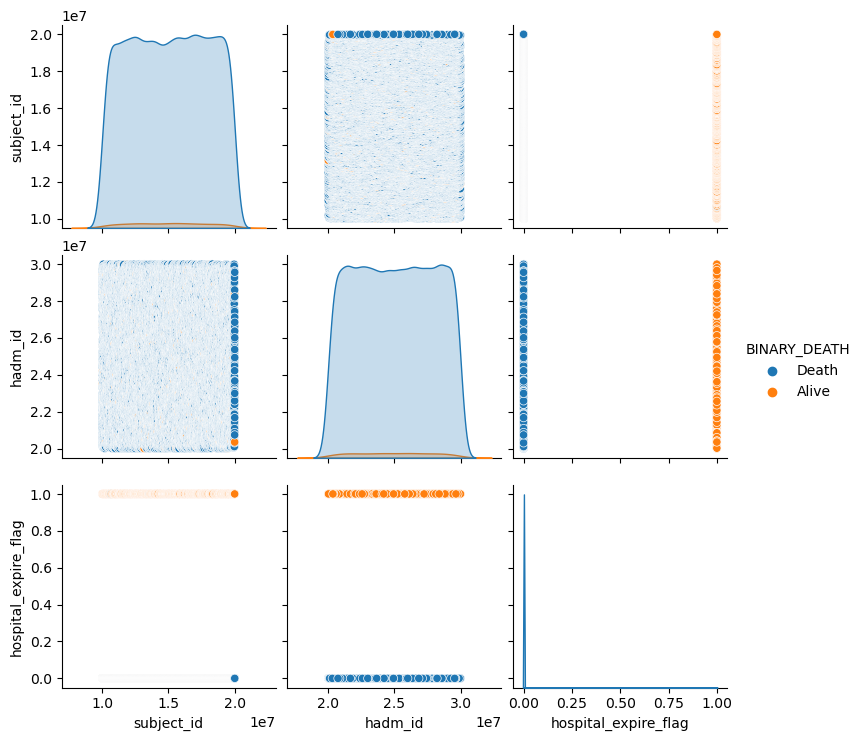

In [23]:
sns.pairplot(droped_30days_df0, hue='BINARY_DEATH')


In [24]:
droped_30days_df0

,subject_id,hadm_id,admittime,dischtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,BINARY_DEATH
17,10000826,21086876,2146-12-18 17:39:00,2146-12-24 19:55:00,DIRECT EMER.,P86FCY,CLINIC REFERRAL,HOME,Other,SINGLE,WHITE,0,Death
18,10000826,28289260,2146-12-31 00:43:00,2147-01-02 17:45:00,EW EMER.,P60CC5,EMERGENCY ROOM,HOME,Other,SINGLE,WHITE,0,Death
19,10000883,25221576,2124-05-14 21:11:00,2124-05-22 10:40:00,DIRECT EMER.,P64BMC,PHYSICIAN REFERRAL,HOME,Other,SINGLE,WHITE,0,Death
24,10000935,24955974,2183-11-07 06:03:00,2183-11-07 11:19:00,EU OBSERVATION,P20D4W,EMERGENCY ROOM,NaN,Medicare,SINGLE,BLACK/AFRICAN AMERICAN,0,Death
37,10001186,24016413,2188-10-20 07:15:00,2188-10-21 15:05:00,SURGICAL SAME DAY ADMISSION,P769P2,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,WHITE,0,Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431177,19998843,29554106,2187-02-08 17:29:00,2187-02-08 09:29:00,DIRECT EMER.,P233F6,PHYSICIAN REFERRAL,NaN,Other,SINGLE,UNKNOWN,0,Death
431195,19999303,23567530,2161-04-03 15:40:00,2161-04-06 10:45:00,DIRECT EMER.,P65MY4,PHYSICIAN REFERRAL,HOME,Other,DIVORCED,WHITE,0,Death
431197,19999379,26008899,2174-11-04 07:34:00,2174-11-05 14:05:00,EU OBSERVATION,P886Y0,EMERGENCY ROOM,NaN,Medicare,MARRIED,WHITE,0,Death
431214,19999784,24935234,2119-07-09 22:31:00,2119-07-12 16:07:00,EU OBSERVATION,P34653,PHYSICIAN REFERRAL,NaN,Other,SINGLE,BLACK/AFRICAN AMERICAN,0,Death


# Analize the insurances

In [25]:
insurance_Medicare_count = droped_30days_df0['insurance'].str.contains('Medicare', case=False).sum()
insurance_Medicare_count

9114

In [26]:
insurance_Other_count = droped_30days_df0['insurance'].str.contains('Other', case=False).sum()
insurance_Other_count

15797

In [27]:
insurance_Medicate_count = droped_30days_df0['insurance'].str.contains('Medicaid', case=False).sum()
insurance_Medicate_count

2783

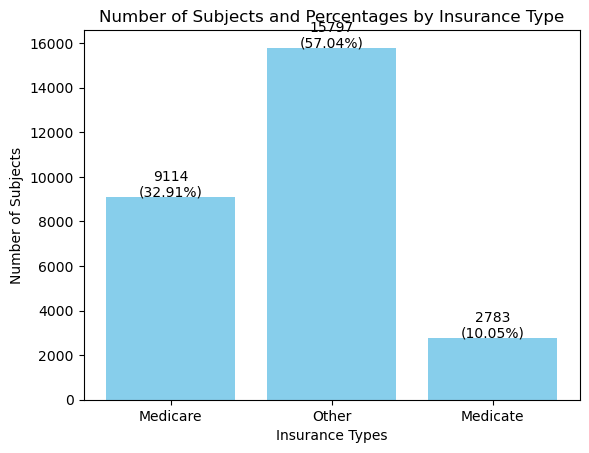

In [28]:
insurance_types = ['Medicare', 'Other', 'Medicate']
counts = [insurance_Medicare_count, insurance_Other_count, insurance_Medicate_count]

# Calculate total subjects
total_subjects = sum(counts)

# Calculate percentages
percentages = [(count / total_subjects) * 100 for count in counts]

# Create a bar plot with counts and percentages
fig, ax = plt.subplots()
bars = ax.bar(insurance_types, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Insurance Types')
plt.ylabel('Number of Subjects')
plt.title('Number of Subjects and Percentages by Insurance Type')

# Display counts and percentages on top of the bars
for bar, count, percent in zip(bars, counts, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{count}\n({percent:.2f}%)', ha='center')

# Show the plot
plt.show()

In [29]:
most_frequent_admissionplace= droped_30days_df0['admission_location'].value_counts().index[0]
most_frequent_admissionplace

#df2['last_careunit'].value_counts().idxmax()


'EMERGENCY ROOM'

In [30]:
most_frequent_admissiontype= droped_30days_df0['admission_type'].value_counts().index[0]
most_frequent_admissiontype

'EW EMER.'

In [31]:
most_frequent_discharge = droped_30days_df0['discharge_location'].value_counts().index[0]
most_frequent_discharge 

'HOME'

# Agora vamos olhar para os diagnósticos

In [32]:
######################################################################################### seeing dignoses_icd.csv file

In [33]:
df1 = pd.read_csv('mimic-iv-2.2/hosp/diagnoses_icd.csv.gz',compression='gzip')

In [34]:
#df1_1 = pd.read_csv('mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz',compression='gzip')
df1 = pd.read_csv('mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz')


Dúvidas

In [35]:
#most_frequent_diagnosis = df1['icd_code'].value_counts().index[0]
#most_frequent_diagnosis
#df1['icd_code'].mode()[0]  não é necessário ocupar um datafrane ocm o resultado
#df1['icd_code'].value_counts().idxmax()  porque é que o result por vezes é diferente ?

df1['icd_code'].value_counts().index[0]

'V419'

In [36]:
#df1['icd_code'].value_counts().idxmax()
#porque é que o result por vezes é diferente ?
#neste caso é igual 

In [37]:
#df1['icd_code'].mode()[0]
#Samuel why the result here its different ?

ah interessante 4019 era tipo hipertensão

In [38]:
df1['icd_code'].value_counts().to_frame()

,icd_code
V419,2
E8889,2
E8841,2
E8842,2
V706,2
...,...
M89439,1
M89432,1
M89431,1
M8943,1


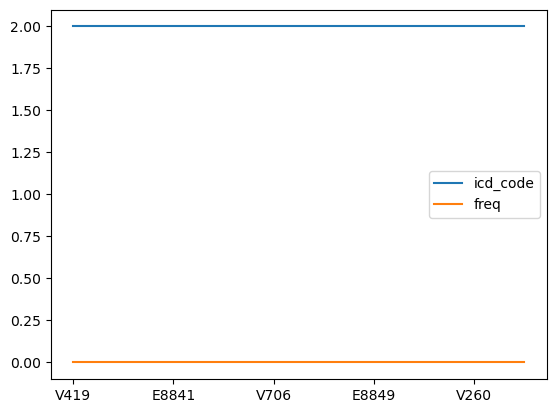

In [39]:
(df1['icd_code']
 .value_counts()
 .to_frame()
 .assign(freq=lambda x: x['icd_code'] / x['icd_code'].sum())
 .round(4)
 .iloc[:10]
 .plot()
)

plt.savefig('<path_to_save>.png')

In [40]:
#secondmost_frequent_diagnosis = df1['icd_code'].value_counts().index[1]


#Title: secondmost_frequent_diagnosis

df1['icd_code'].value_counts().index[1]

'E8889'

In [41]:
#thirdmost_frequent_diagnosis = df1['icd_code'].value_counts().index[2]
#thirdmost_frequent_diagnosis

#Title: thirdmost_frequent_diagnosis

df1['icd_code'].value_counts().index[2]

'E8841'

In [42]:
#fourmost_frequent_diagnosis = df1['icd_code'].value_counts().index[3]
#fourmost_frequent_diagnosis

#Title: fourmost_frequent_diagnosis

df1['icd_code'].value_counts().index[3]

'E8842'

In [43]:
######################################################################################### seeing icustays.csv file

In [44]:
#df2 = pd.read_csv('mimic-iv-2.2/icu/icustays.csv.gz',compression='gzip')
df2 = pd.read_csv('mimic-iv-2.2/icu/icustays.csv.gz')

In [45]:
df2.shape

(73181, 8)

In [46]:
df2.head(10)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588
5,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817
6,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352
7,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576
8,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912
9,10002155,28994087,31090461,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2130-09-24 00:50:00,2130-09-27 22:13:41,3.891447


In [47]:
#most_frequent_careunit = df2['first_careunit'].value_counts().index[0]

#Title: most_frequent_first_careunit

df2['first_careunit'].value_counts().index[0]

'Medical Intensive Care Unit (MICU)'

In [48]:
#most_frequent_endcareunit = df2['last_careunit'].value_counts().index[0]

#Title: most_frequent_endcareunit

df2['last_careunit'].value_counts().index[0]


'Medical Intensive Care Unit (MICU)'

In [49]:
df2['intime'] = pd.to_datetime(df2['intime'])
df2['outtime'] = pd.to_datetime(df2['outtime'])

# Filter rows where both first_careunit and last_care unit are 'Medical Intensive Care Unit (MICU)'
micu_rows = df2[(df2['first_careunit'] == 'Medical Intensive Care Unit (MICU)') & (df2['last_careunit'] == 'Medical Intensive Care Unit (MICU)')]


Analize the time that he disppends in the MICU

/tmp/ipykernel_15940/4100170737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micu_rows['stay_duration'] = (micu_rows['outtime'] - micu_rows['intime']).dt.total_seconds() / (60 * 60)  # Convert to hours


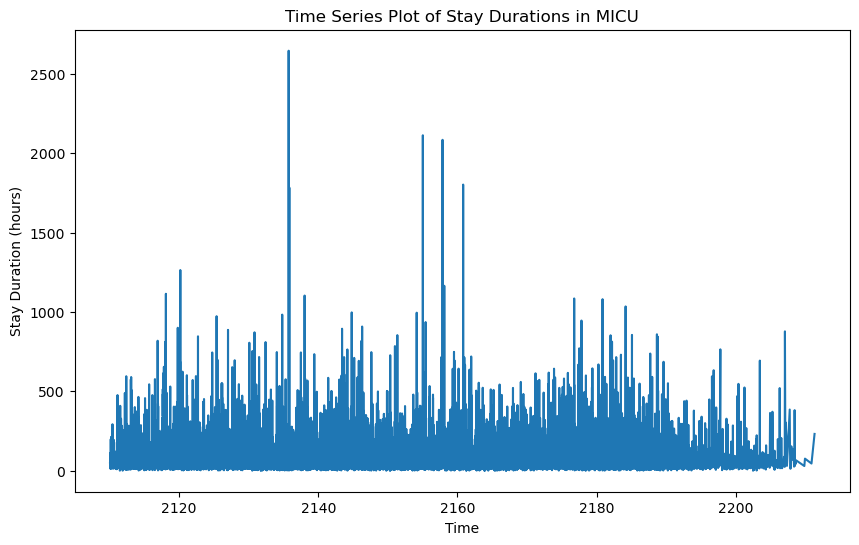

In [50]:

# Calculate time difference between intime and outtime
#micu_rows['stay_duration'] = micu_rows['outtime'] - micu_rows['intime']
#ERROR

# Display the resulting DataFrame
#print(micu_rows)
micu_rows.head(10)

# Calculate time difference between intime and outtime
micu_rows['stay_duration'] = (micu_rows['outtime'] - micu_rows['intime']).dt.total_seconds() / (60 * 60)  # Convert to hours
#Runs with Warnings

#micu_rows['stay_duration'] = (micu_rows['outtime'] - micu_rows['intime']).dt.total_seconds() / (24 * 60 * 60)  # Convert to days
#ERROR


# Sort the DataFrame by stay_duration in descending order
micu_rows = micu_rows.sort_values(by='stay_duration', ascending=False)

# Set the 'intime' column as the index for time series plotting
micu_rows.set_index('intime', inplace=True)

# Create a time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=micu_rows['stay_duration'])

# Set plot title and labels
plt.title('Time Series Plot of Stay Durations in MICU')
plt.xlabel('Time')
plt.ylabel('Stay Duration (hours)')

# Display the plot
plt.show()

In [51]:
#X-Axis (Time): The x-axis represents time. Each point on the x-axis corresponds to a specific time point where a patient entered the MICU.
#Y-Axis (Stay Duration): The y-axis represents stay duration in hours. It shows how long each patient stayed in the MICU during their respective visits.

I think that a Violin plot here makes some sense and its out of the box 

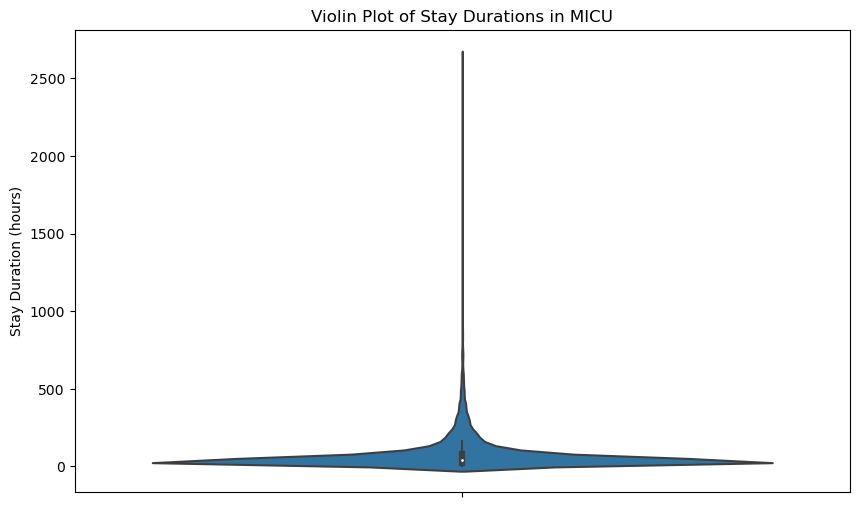

In [52]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=micu_rows, y='stay_duration')

# Set plot title and labels
plt.title('Violin Plot of Stay Durations in MICU')
plt.ylabel('Stay Duration (hours)')

# Display the plot
plt.show()

In [53]:
#The y-axis represents stay duration in hours, and the violin plot shows the distribution of stay durations in the MICU. Replace the sample data with your actual data.
#The width of the "violin" at each value of stay duration represents the density of data points at that value.

In [54]:
df5 = pd.read_csv('mimic-iv-2.2/icu/ingredientevents.csv.gz')

KeyboardInterrupt: 

In [ ]:
df5.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate
0,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,220490,100.000000,ml,NaN,NaN,415918,415918,FinishedRunning,0,100.0
1,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,227075,100.000000,ml,NaN,NaN,415918,415918,FinishedRunning,0,100.0
2,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,220490,200.000000,ml,NaN,NaN,7140773,7140773,FinishedRunning,0,200.0
3,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,227075,200.000000,ml,NaN,NaN,7140773,7140773,FinishedRunning,0,200.0
4,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,220490,49.999999,ml,100.0,mL/hour,7578214,7578214,FinishedRunning,0,50.0


Analize the usage of the items in each subject_id

In [ ]:
grouped_df = df5.groupby(['subject_id', 'itemid'])['amount'].sum().reset_index()

#Display the resulting grouped DataFrame
print(grouped_df)

#Here i can understand what are the item_id's more critical for my Hospital and be attend to the stockd
#and understand by each subject_id each item that he needs
#For exasmple the itemid 220490 and 227075 are veru usefull item just seeing the head

        subject_id  itemid       amount
0         10000032  220490   499.999998
1         10000032  226509    99.999998
2         10000032  227075   400.000000
3         10000980  220490   469.477793
4         10000980  226060    71.311225
...            ...     ...          ...
285089    19999840  227075  1400.000000
285090    19999987  220490  4495.827404
285091    19999987  226060   111.668960
285092    19999987  227074  2995.827404
285093    19999987  227075   500.000000

[285094 rows x 3 columns]


Now we see the magic inside the usage of items by subject_id !

In [57]:
# Pivot the DataFrame to create a table for grouped bar plot
pivot_df = grouped_df.pivot(index='subject_id', columns='itemid', values='amount')

# Create the grouped bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 10))

# Set plot title and labels
plt.title('Usage of Item IDs by Subject IDs')
plt.xlabel('Subject ID')
plt.ylabel('Usage Amount')

# Display the plot
plt.show()

: 

: 

In [ ]:
#frequent_patient = df2['subject_id'].value_counts()
#frequent_patient

df2['subject_id'].value_counts()


In [ ]:
#most_frequent_patient = df2['subject_id'].value_counts().index[0]


#df2['subject_id'].value_counts().idxmax() sometimes different....

#Title: most_frequent_patient
df2['subject_id'].value_counts().index[0]

18358138

In [ ]:
frequent_patient = pd.DataFrame({'subject_id': frequent_patient.index, 
                                 'count_icu': frequent_patient.values})
#csv_path = 'frequent_patient_icu.csv'
#frequent_patient.to_csv(csv_path, index=False)

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
df4 = frequent_patient#pd.read_csv('frequent_patient_icu.csv')
df4

subject_id
18358138    37
17585185    33
12468016    33
13269859    30
18676703    26
            ..
13794732     1
13795136     1
13795513     1
13795693     1
19999987     1
Name: count, Length: 50920, dtype: int64

In [ ]:
#----------------------------------------------------------------------------------

In [ ]:
# JUNTAR DATASETS - criar dataset new30df

In [ ]:
df3 = pd.read_csv('mimic-iv-2.2/hosp/patients.csv.gz',compression='gzip')
df3

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [ ]:
#drop columns 
columns_to_drop = ['hadm_id','admittime','dischtime','admit_provider_id','admission_location','insurance','hospital_expire_flag']
new30df = droped_30days_df0.drop(columns=columns_to_drop)

In [ ]:
frequent_patient_adm = droped_30days_df0['subject_id'].value_counts()
frequent_patient_adm

subject_id
14799353    7
14977395    6
13074531    6
17903094    6
15462466    5
           ..
14156204    1
14155916    1
14155341    1
10823672    1
15051397    1
Name: count, Length: 23979, dtype: int64

In [ ]:
frequent_patient_adm = pd.DataFrame({'subject_id': frequent_patient_adm.index, 'count_adm': frequent_patient_adm.values})
csv_path = 'frequent_patient_adm.csv'
frequent_patient_adm.to_csv(csv_path, index=False)

In [ ]:
df5 = pd.read_csv('frequent_patient_adm.csv')
df5

,subject_id,count_adm
0,15496609,238
1,15464144,185
2,10714009,163
3,16662316,142
4,15229574,130
...,...,...
179924,14292225,1
179925,14292221,1
179926,14292216,1
179927,14292138,1


In [ ]:
new30df1 = new30df.merge(df3[['subject_id','gender','anchor_age']], on='subject_id', how='left')
new30df1

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19
...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58


In [ ]:
new30df2 = new30df1.merge(df4[['subject_id','count_icu']], on='subject_id', how='left')
new30df2['count_icu'].fillna(0, inplace=True)
new30df2

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52,1.0
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0
...,...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0


In [ ]:
new30df3 = new30df2.merge(df5[['subject_id','count_adm']], on='subject_id', how='left')
new30df3['count_adm'].fillna(0, inplace=True)
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52,1.0,4
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1
...,...,...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0,2


In [ ]:
df11 = df1.merge(df1_1[['icd_code','long_title']], on='icd_code', how='left')
df11

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
4860275,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
4860276,19999987,23865745,8,78039,9,Other convulsions
4860277,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
4860278,19999987,23865745,10,36846,9,Homonymous bilateral field defects


In [ ]:
filtered_df11 = df11.loc[df11['seq_num'] == 1]
len(filtered_df11)
df11droped = filtered_df11.drop(columns = ['hadm_id','seq_num','icd_version'])

In [ ]:
df11droped

,subject_id,icd_code,long_title
0,10000032,5723,Portal hypertension
8,10000032,07071,Unspecified viral hepatitis C with hepatic coma
16,10000032,07054,Chronic hepatitis C without mention of hepatic...
27,10000032,45829,Other iatrogenic hypotension
41,10000068,30500,"Alcohol abuse, unspecified"
...,...,...,...
4860209,19999828,T8141XA,"Infection following a procedure, superficial i..."
4860228,19999828,T8131XA,Disruption of external operation (surgical) wo...
4860250,19999840,3453,Grand mal status
4860262,19999840,43491,"Cerebral artery occlusion, unspecified with ce..."


In [ ]:
#---------------------------------------------------------------------------------- Plots

In [ ]:
len(new30df3)

426899

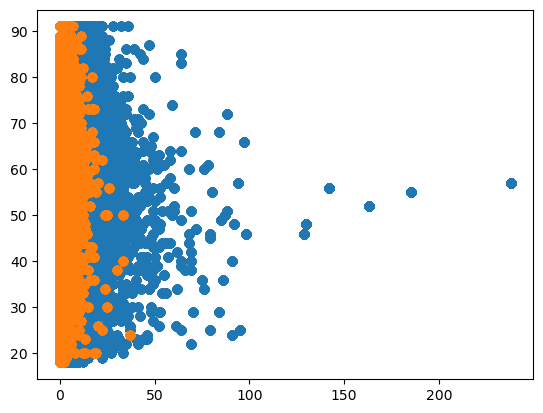

In [ ]:
Age = new30df3['anchor_age']
count_adm = new30df3['count_adm']
count_icu = new30df3['count_icu']
plt.scatter(count_adm, Age)
plt.scatter(count_icu, Age)
plt.show()

(array([29571., 30505., 30294., 41725., 51663., 57336., 64505., 46497.,
        39273., 35530.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <BarContainer object of 10 artists>)

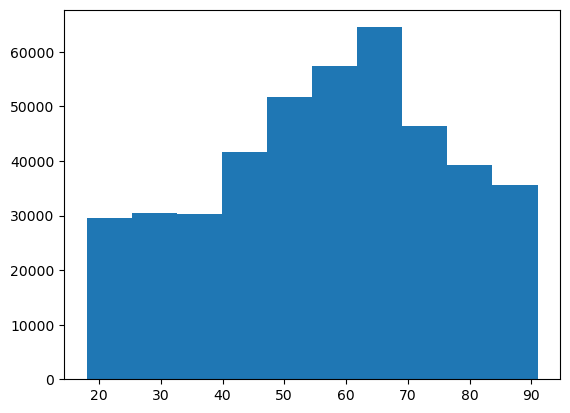

In [ ]:
plt.hist(Age)

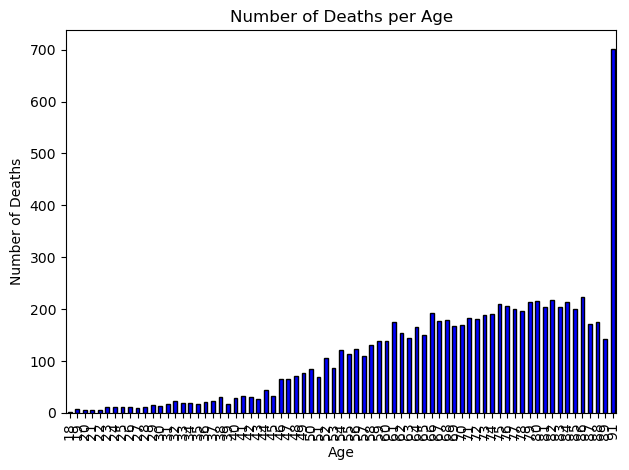

In [ ]:
age_groups = new30df3.groupby('anchor_age')['BINARY_DEATH'].sum()

age_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Deaths per Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

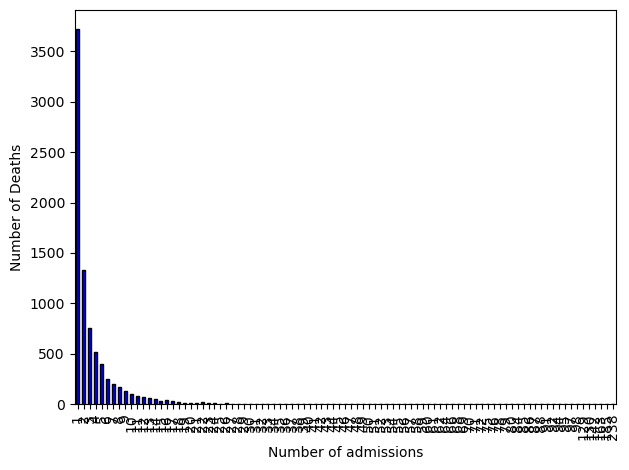

In [ ]:
countsadm_groups = new30df3.groupby('count_adm')['BINARY_DEATH'].sum()

countsadm_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

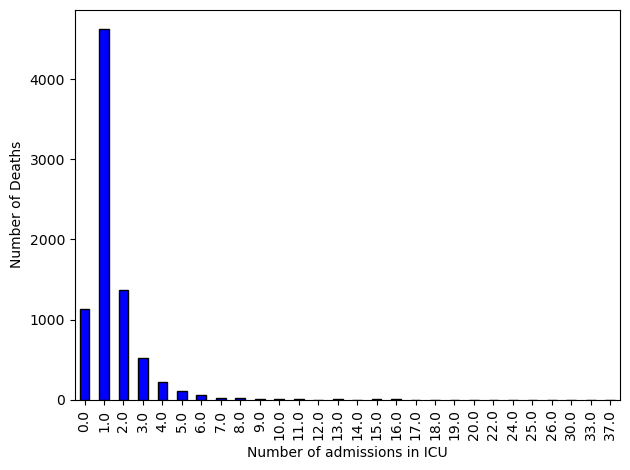

In [ ]:
countsicu_groups = new30df3.groupby('count_icu')['BINARY_DEATH'].sum()

countsicu_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions in ICU')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  #Quem vai para ICU, quase que não escapa   . 0 era Nan values. 

In [ ]:
#################################################################################################

In [ ]:
new30df4 = pd.merge(new30df3,df11droped, on='subject_id', how='left')
new30df4

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4,5723,Portal hypertension
1,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4,07071,Unspecified viral hepatitis C with hepatic coma
2,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4,07054,Chronic hepatitis C without mention of hepatic...
3,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4,45829,Other iatrogenic hypotension
4,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4,5723,Portal hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...
3178860,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2,3453,Grand mal status
3178861,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2,43491,"Cerebral artery occlusion, unspecified with ce..."
3178862,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0,2,3453,Grand mal status
3178863,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0,2,43491,"Cerebral artery occlusion, unspecified with ce..."


In [ ]:
len(new30df4)

3178865

In [ ]:
len(df0)

431231

In [ ]:
#Só mostrar a informaçao por cada subject_id
new30df4drop = new30df4.drop_duplicates(subset='subject_id', keep='first')
len(new30df4drop)

179929

In [ ]:
new30df4drop


,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4,5723,Portal hypertension
16,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1,30500,"Alcohol abuse, unspecified"
17,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,M,72,0.0,2,G3183,Dementia with Lewy bodies
21,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,M,25,0.0,1,5283,Cellulitis and abscess of oral soft tissues
22,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,F,48,0.0,2,R1310,"Dysphagia, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...
3178531,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1,9953,"Allergy, unspecified, not elsewhere classified"
3178532,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
3178856,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2,T8141XA,"Infection following a procedure, superficial i..."
3178860,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2,3453,Grand mal status


In [ ]:
# Count occurrences of the word "hypertension" in the "long_title" column
hypertension_count = new30df4drop['long_title'].str.contains('hypertension', case=False).sum()
hypertension_count 

1092

In [ ]:
# Count occurrences of the word "hyperlipidemia" in the "long_title" column
hyperlipidemia_count = new30df4drop['long_title'].str.contains('hyperlipidemia', case=False).sum()
hyperlipidemia_count

6

In [ ]:
from collections import Counter
import re

In [ ]:
# Convert 'icd_code' to strings
new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
icd_counts = Counter(new30df4drop['long_title'])
icd_code_counts = Counter(new30df4drop['icd_code'])
# Find the most common 'icd_code' strings
most_common_icd = icd_counts.most_common(5)
most_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
icd = [icd for icd, count in most_common_icd]
icd_codes = [code for code, count in most_common_icd_codes]
print(icd)
print(icd_codes)
code_counts = [count for code, count in most_common_icd_codes]


['Chest pain, unspecified', 'Other chest pain', 'Coronary atherosclerosis of native coronary artery', 'Alcohol abuse, unspecified', 'Syncope and collapse']
['78650', '41401', '78659', '30500', '311']


/tmp/ipykernel_557/2902971257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)


In [ ]:
# Filter the dataset for the common codes
filtered_dataset = new30df4drop[new30df4drop['long_title'].isin(icd)]
filtered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
16,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1,30500,"Alcohol abuse, unspecified"
45,10000886,EU OBSERVATION,NaN,SINGLE,UNABLE TO OBTAIN,0,M,18,0.0,1,30500,"Alcohol abuse, unspecified"
859,10002131,EU OBSERVATION,NaN,WIDOWED,WHITE,0,F,87,0.0,3,78650,"Chest pain, unspecified"
1772,10004422,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,M,78,1.0,1,41401,Coronary atherosclerosis of native coronary ar...
1773,10004457,AMBULATORY OBSERVATION,NaN,SINGLE,WHITE,0,M,65,1.0,6,41401,Coronary atherosclerosis of native coronary ar...
...,...,...,...,...,...,...,...,...,...,...,...,...
3178225,19997887,EU OBSERVATION,NaN,MARRIED,WHITE,0,F,57,0.0,3,78650,"Chest pain, unspecified"
3178270,19997922,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,35,0.0,1,78650,"Chest pain, unspecified"
3178341,19998497,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,F,82,0.0,8,41401,Coronary atherosclerosis of native coronary ar...
3178496,19999156,EU OBSERVATION,NaN,MARRIED,WHITE,0,F,62,0.0,1,78650,"Chest pain, unspecified"


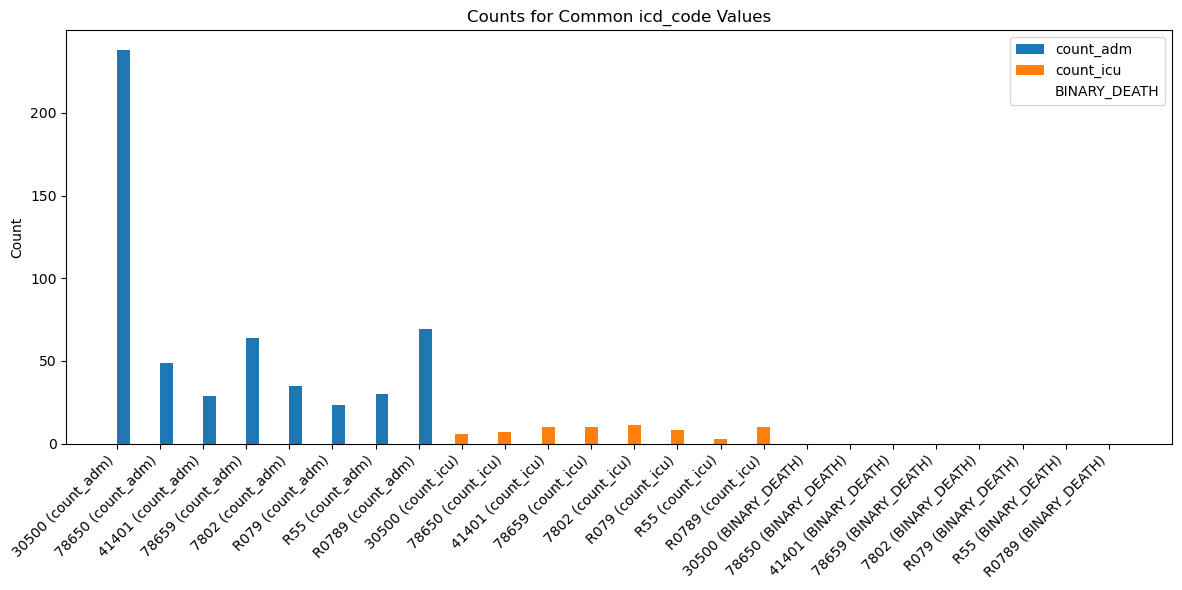

In [ ]:
# Grouped bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(filtered_dataset['icd_code'] + ' (count_adm)', filtered_dataset['count_adm'], width=0.3, align='edge', label='count_adm')
plt.bar(filtered_dataset['icd_code'] + ' (count_icu)', filtered_dataset['count_icu'], width=0.3, align='center', label='count_icu')
plt.bar(filtered_dataset['icd_code'] + ' (BINARY_DEATH)', filtered_dataset['BINARY_DEATH'], width=0.3, align='edge', label='BINARY_DEATH', alpha=0)
plt.ylabel('Count')
plt.title('Counts for Common icd_code Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Convert the "long_title" column to strings
new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)

# Concatenate all "long_title" strings
concatenated_text = ' '.join(new30df4drop['long_title'])

# Tokenize the text into words
words = re.findall(r'\w+', concatenated_text.lower())  # Convert to lowercase for case-insensitive counting

# Filter words with more than 5 letters
filtered_words = [word for word in words if len(word) > 5 and "unspecified" not in word and "without" not in word  and "mention" not in word]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Find the most common word
most_common_word, most_common_count = word_counts.most_common(1)[0]

print("Most common word:", most_common_word)
print("Count:", most_common_count)

/tmp/ipykernel_557/118066361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)


Most common word: fracture
Count: 14429


In [ ]:
# Find the most common word
most_common_words = word_counts.most_common(10)

print("Ten most common words")
for word, count in most_common_words:
    print(word, "-", count)

Ten most common words
fracture - 14429
initial - 11162
encounter - 10501
closed - 9567
neoplasm - 8644
hemorrhage - 8288
malignant - 7488
infarction - 7420
condition - 7268
disorder - 7202


In [ ]:
################# in not dropped file: new30df4

In [ ]:
# Convert 'icd_code' to strings
new30df4['icd_code'] = new30df4['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
bicd_counts = Counter(new30df4['long_title'])
bicd_code_counts = Counter(new30df4['icd_code'])
# Find the most common 'icd_code' strings
bmost_common_icd = icd_counts.most_common(5)
bmost_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
bicd = [icd for icd, count in bmost_common_icd]
bicd_codes = [code for code, count in bmost_common_icd_codes]
print(icd)
print(icd_codes)
bcode_counts = [count for code, count in bmost_common_icd_codes]


['Chest pain, unspecified', 'Other chest pain', 'Coronary atherosclerosis of native coronary artery', 'Alcohol abuse, unspecified', 'Syncope and collapse']
['78650', '41401', '78659', '30500', '311']


In [ ]:
# Filter the dataset for the common codes
bfiltered_dataset = new30df4[new30df4['long_title'].isin(bicd)]
bfiltered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
16,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1,30500,"Alcohol abuse, unspecified"
45,10000886,EU OBSERVATION,NaN,SINGLE,UNABLE TO OBTAIN,0,M,18,0.0,1,30500,"Alcohol abuse, unspecified"
147,10001338,DIRECT EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,F,43,0.0,4,78650,"Chest pain, unspecified"
151,10001338,EU OBSERVATION,NaN,MARRIED,WHITE,0,F,43,0.0,4,78650,"Chest pain, unspecified"
155,10001338,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,F,43,0.0,4,78650,"Chest pain, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...
3178403,19998497,URGENT,SKILLED NURSING FACILITY,WIDOWED,WHITE,0,F,82,0.0,8,41401,Coronary atherosclerosis of native coronary ar...
3178496,19999156,EU OBSERVATION,NaN,MARRIED,WHITE,0,F,62,0.0,1,78650,"Chest pain, unspecified"
3178508,19999298,EU OBSERVATION,NaN,SINGLE,WHITE,0,M,20,0.0,1,30500,"Alcohol abuse, unspecified"
3178514,19999379,EU OBSERVATION,NaN,MARRIED,WHITE,0,F,91,0.0,2,41401,Coronary atherosclerosis of native coronary ar...


In [ ]:
# Grouped bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(bfiltered_dataset['icd_code'] + ' (count_adm)', bfiltered_dataset['count_adm'], width=0.3, align='edge', label='count_adm')
plt.bar(bfiltered_dataset['icd_code'] + ' (count_icu)', bfiltered_dataset['count_icu'], width=0.3, align='center', label='count_icu')
plt.bar(bfiltered_dataset['icd_code'] + ' (BINARY_DEATH)', bfiltered_dataset['BINARY_DEATH'], width=0.3, align='edge', label='BINARY_DEATH', alpha=0)
plt.ylabel('Count')
plt.title('Counts for Common icd_code Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
##########################################################################

In [ ]:
csv_path = 'new30df4drop.csv'
new30df4drop.to_csv(csv_path, index=False)